<a href="https://colab.research.google.com/github/AI-in-a-Minute/Deep-Learning-Algorithms/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import necessary libraries
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import datetime
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')

In [23]:
titanic_df.shape

(891, 12)

In [24]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
# Check for missing values
missing_values = titanic_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [27]:
titanic_df['Embarked']

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [28]:
# Handle missing values

titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-28-2500764658.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [29]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

In [30]:
titanic_df.shape

(891, 13)

In [31]:
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
#one hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], prefix=['Embarked'])

In [32]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,False,False,True


In [33]:
titanic_df.drop_duplicates(inplace=True)

In [34]:
titanic_df.shape

(891, 15)

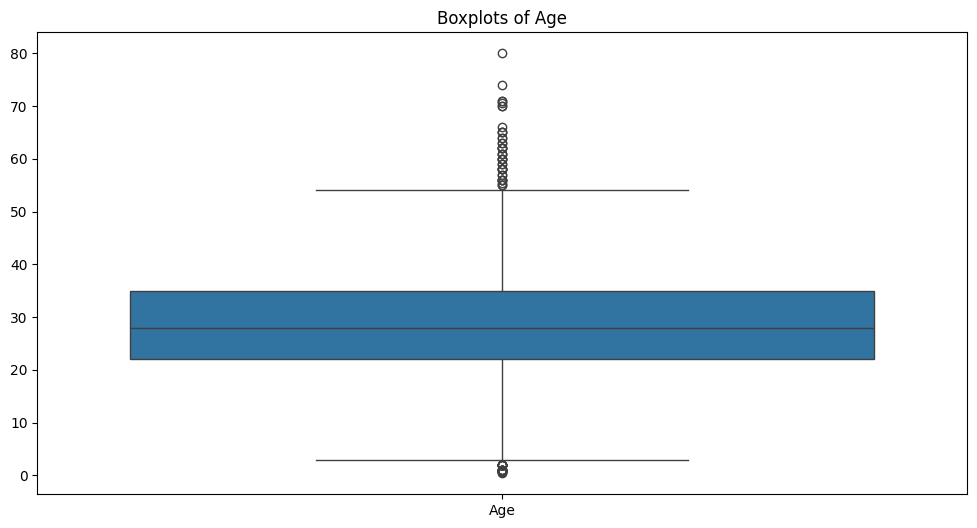

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=titanic_df[['Age']])
plt.title('Boxplots of Age')
plt.show()

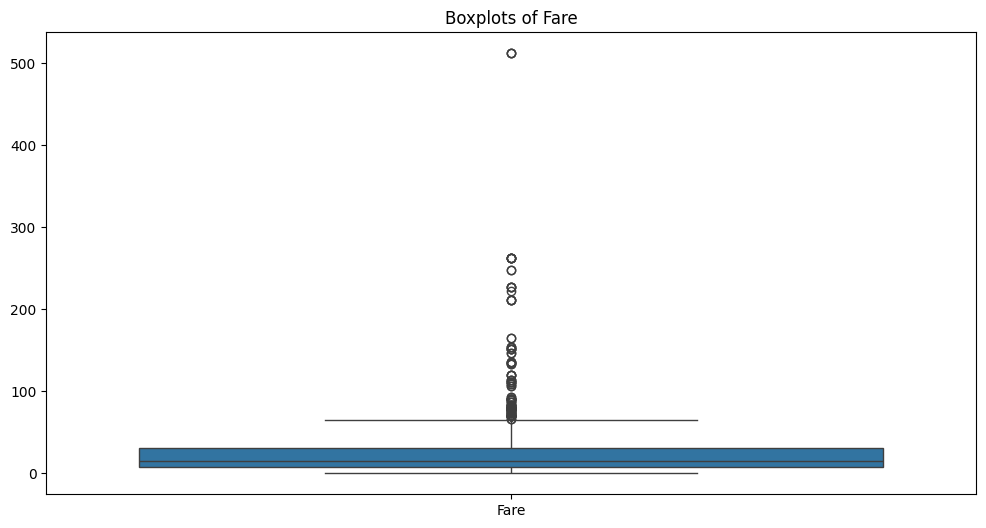

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_df[['Fare']])
plt.title('Boxplots of Fare')
plt.show()

In [37]:
Q1 = titanic_df[['Fare', 'Age']].quantile(0.25)
Q3 = titanic_df[['Fare', 'Age']].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers for 'Fare' and 'Age'
outliers_fare = (titanic_df['Fare'] < lower_bound['Fare']) | (titanic_df['Fare'] > upper_bound['Fare'])
outliers_age = (titanic_df['Age'] < lower_bound['Age']) | (titanic_df['Age'] > upper_bound['Age'])

In [38]:

# Display the number of outliers using IQR method
print("Outliers by IQR:\n")
print("Outliers in 'Fare':", outliers_fare.sum())
print("Outliers in 'Age':", outliers_age.sum())

Outliers by IQR:

Outliers in 'Fare': 116
Outliers in 'Age': 66


In [39]:
# Outliers for Fare
z_scores_fare = np.abs(stats.zscore(titanic_df['Fare']))
outliers_fare = z_scores_fare > 3
outlier_data_fare = titanic_df[outliers_fare]
print("Outliers for Fare:\n", outlier_data_fare[['Fare']])

# Outliers for Age
z_scores_age = np.abs(stats.zscore(titanic_df['Age']))
outliers_age = z_scores_age > 3
outlier_data_age = titanic_df[outliers_age]
print("Outliers for Age:\n", outlier_data_age[[ 'Age']])

Outliers for Fare:
          Fare
27   263.0000
88   263.0000
118  247.5208
258  512.3292
299  247.5208
311  262.3750
341  263.0000
377  211.5000
380  227.5250
438  263.0000
527  221.7792
557  227.5250
679  512.3292
689  211.3375
700  227.5250
716  227.5250
730  211.3375
737  512.3292
742  262.3750
779  211.3375
Outliers for Age:
       Age
96   71.0
116  70.5
493  71.0
630  80.0
672  70.0
745  70.0
851  74.0


In [40]:
# Isolation Forest for Fare
iso_forest_fare = IsolationForest(contamination=0.05)
outliers_fare = iso_forest_fare.fit_predict(titanic_df[['Fare']])
outliers_fare = outliers_fare == -1
outlier_data_fare = titanic_df[outliers_fare]

# Isolation Forest for Age
iso_forest_age = IsolationForest(contamination=0.05)
outliers_age = iso_forest_age.fit_predict(titanic_df[['Age']])
outliers_age = outliers_age == -1
outlier_data_age = titanic_df[outliers_age]

# Print the outlier DataFrames
print("Outliers for Fare:\n", outlier_data_fare)
print("Outliers for Age:\n", outlier_data_age)

Outliers for Fare:
      PassengerId  Survived  Pclass  \
27            28         0       1   
31            32         1       1   
88            89         1       1   
118          119         0       1   
195          196         1       1   
258          259         1       1   
268          269         1       1   
269          270         1       1   
297          298         0       1   
299          300         1       1   
305          306         1       1   
311          312         1       1   
318          319         1       1   
319          320         1       1   
325          326         1       1   
332          333         0       1   
337          338         1       1   
341          342         1       1   
373          374         0       1   
377          378         0       1   
380          381         1       1   
390          391         1       1   
435          436         1       1   
438          439         0       1   
498          499         0    